# 02 Position und Koordinaten

Wie werden die Positionen von Figuren und Blöcken angegeben?

Der folgende Code-Block muss am Anfang jedes Skripts stehen:

In [1]:
import sys
import math
import time
import os

import miney
import miney_toolbox as mtb

MINETEST_USER="knue" # replace by actual player name
MINETEST_PASSWORD="" # replace by actual player password ... watch out not to commit this to git, though

mt = miney.Minetest("localhost", MINETEST_USER, MINETEST_PASSWORD )


## Figuren

Zunächst fragen wir, welche Figuren (Player) vorhanden sind. So listet man alle derzeitigen auf. Es muss mindestens der oben verwendete Entwicklungs-Figur dabei sein.

In [2]:
print( "Players:")
for p in mt.player:
    print( p )

Players:
<minetest player "knue">


Danach können wir einige Angaben zur Figur abfragen:

In [3]:
playername= "knue"
player= mt.player[playername]
print( "Position: ", mtb.pos_as_int(player) )
print( "Richtung: ", player.look_horizontal ) 
print( "Quadrant: ", mtb.quadrant( player ) )
print( "Hoch/runter: ", player.look_vertical )

Position:  [-813   10  194]
Richtung:  1.4568263292313


Quadrant:  [-1  0  1]
Hoch/runter:  -0.28623399138451


## Koordinaten

Wir arbeiten weiter mit der Position, die als Vektor `[x, y, z]` angegeben ist bzw. $ \begin{pmatrix} x \\ y \\ z \end{pmatrix} $. Dabei sind $x$ und $z$ die horizontalen Richtungen und $y$ die vertikale Richtung. Wir lassen uns die Position der Figur in die Variable `pos` übergeben und definieren einen Abstand von der Figur `offset` ebenfalls als `[x,y,z]` Vektor. Die beiden Vektoren kann man einfach elementweise addieren und erhält die Ziel-Position:

In [4]:
pos= mtb.pos_as_int(player)
offset= [2,1,1]
newpos= pos + offset
print("Ziel-Position: ",newpos)

Ziel-Position:  [-811   11  195]


Miney stellt die Positionen in einer anderen Weise dar, mit der man keine Berechnungen ausführen kann. Daher wandeln wir die Position in die Miney-Darstellung um:

In [5]:
p= mtb.conv.ntom( newpos )
print(p)


{'x': -811.0, 'y': 11.0, 'z': 195.0}


## Blöcke setzen

Damit können wir eine Block mit einem gewählten Material neben der Figur in die Landschaft setzen:

In [6]:
material= "wool:red"
mt.node.set( p, name= material ) 

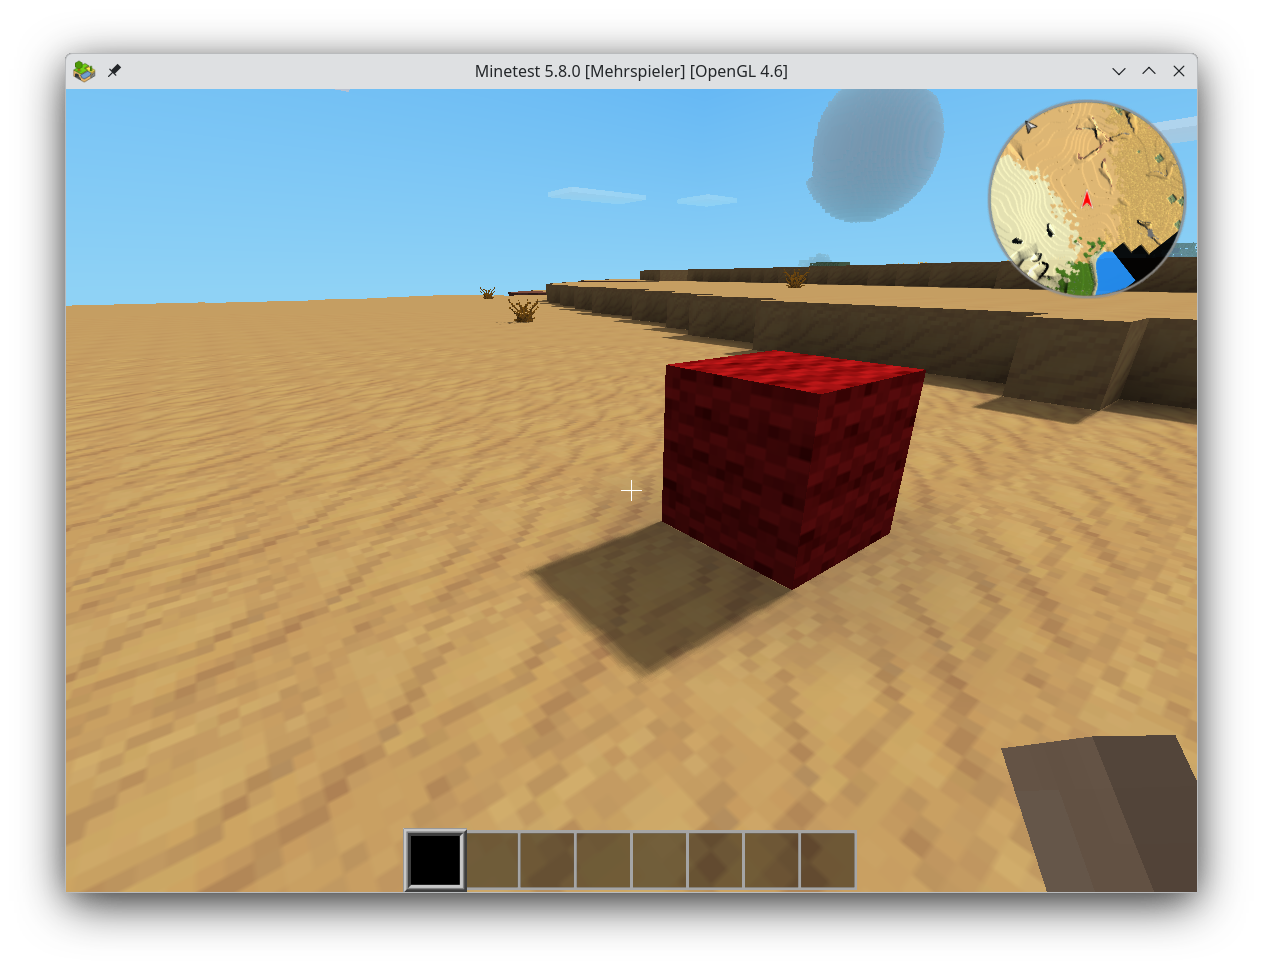

... bewege die Figur ein wenig und wiederhole das gesamte Notebook.

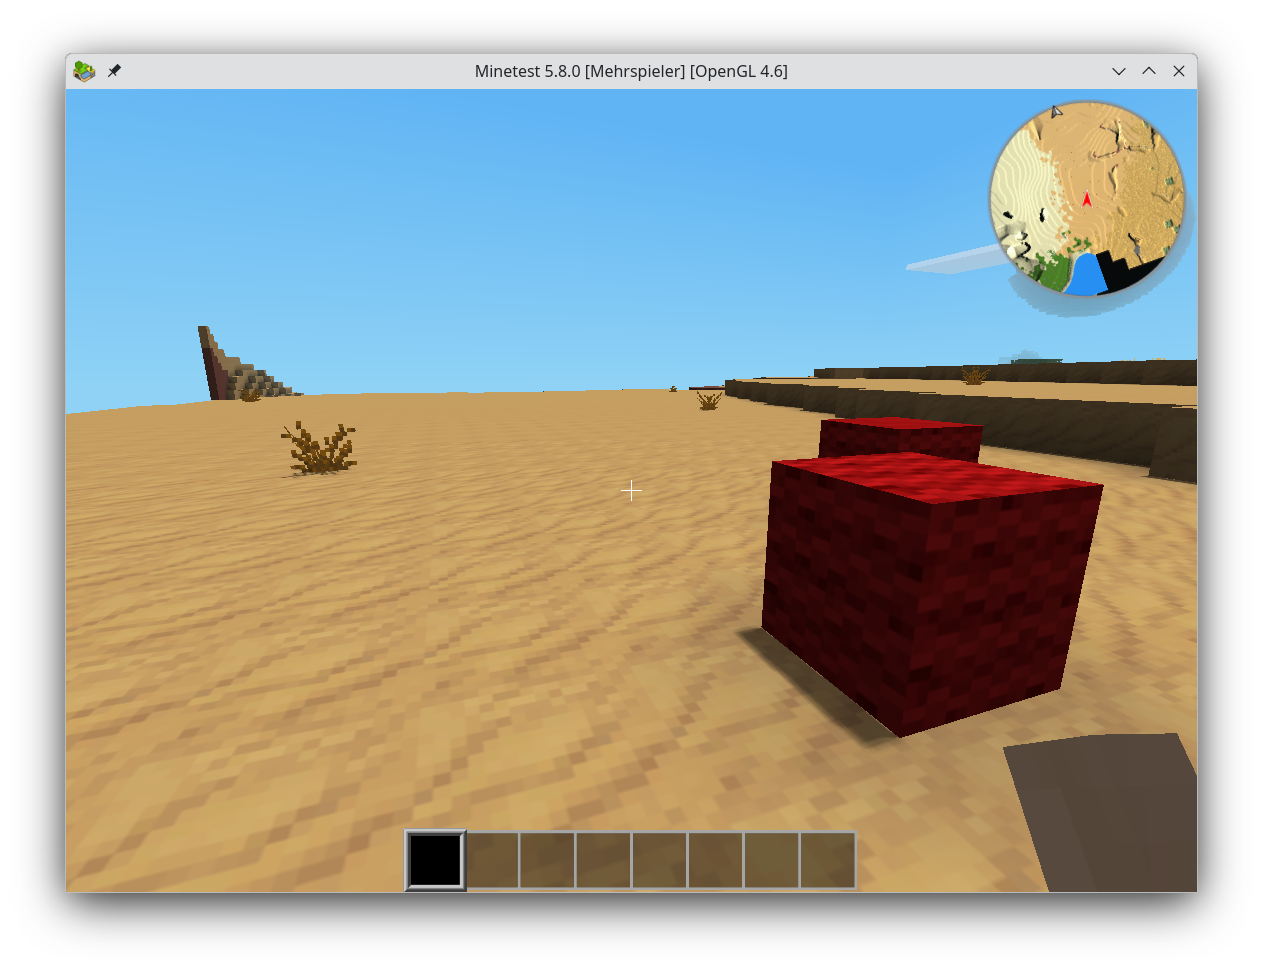

## Ergänzung

Mit einer alternativen Funktion `mtb.set( pos, list_of_positionsm, material )` kann man auch direkt einen Vektor oder eine Liste von Vektoren setzen. Sie werden immer relativ zur Position `pos` platziert.

In [7]:
positions= []
positions.append( [2,2,1] )
positions.append( [2,3,1] )
mtb.set(mt, pos, positions, "wool:green")

mtb.set(mt, pos, [[2,4,1]], "wool:blue")

## Aufgabe

Markiere die Achsenrichtungen für x, y und z durch je 10 Blöcke der Farben rot, grün bzw. blau in die jeweils positive Koordinatenrichtung. Lasse den Ursprung $ \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix} $ frei. Verwende entweder `mt.node.set()` zusammen mit `mtb.conv.ntom()` oder `mtb.set()`.

Als Zusatzaufgabe markiere die jeweils negative Achsenrichtung mit gestrichelten Linien der gleichen Länge, sprich jeder zweite Block ausgelassen.

# Lösung

Mit 3 Schleifen:

In [10]:
# get current position of player
pos= mtb.pos_as_int(player)

offset=[1,1,5]

positions.clear()
for i in range(1,11):
    positions.append( [i,0,0] )
for i in range(1,11,2):
    positions.append( [-i,0,0] )
mtb.set(mt, pos + offset, positions, "wool:red")

positions.clear()
for i in range(1,11):
    positions.append( [0,i,0] )
for i in range(1,11,2):
    positions.append( [0,-i,0] )
mtb.set(mt, pos + offset, positions, "wool:green")

positions.clear()
for i in range(1,11):
    positions.append( [0,0,i] )
for i in range(1,11,2):
    positions.append( [0,0,-i] )
mtb.set(mt, pos + offset, positions, "wool:blue")